In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from tqdm import trange
from collections import Counter
from scipy import stats

In [125]:
chrom="NW_022145615.1"

In [126]:
coords=pd.read_csv("lostruct_results/type_snp_size_100000_chromosome_all/"+chrom+".regions.csv")

In [127]:
df=pd.read_csv("lostruct_results/type_snp_size_100000_chromosome_all/"+chrom+".pca.csv")

In [128]:
pops=df.columns.to_list()[3:]
pops=[i.split("_")[3] for i in pops]
pops=[i.split("/")[1] for i in pops][:int((len(df.columns.to_list())-3)/2)]

def get_agglo(values, k):
  X = np.array(values).reshape(-1, 1)

  agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')

  # Fit the model to the data
  agg_clustering.fit(X)

  labels = agg_clustering.labels_

  return labels

NUM_CLUST=7

------------------------------------------------------
Percent of clusters most common pop:  1.9847222222222218
chrom    NW_022145615.1
start           5039360
end             5489945
Name: 9, dtype: object
ANOVA p-value:  0.12734602963514866
Correlation coefficient: -0.25075213313209627
P-value: 0.002805962517636177


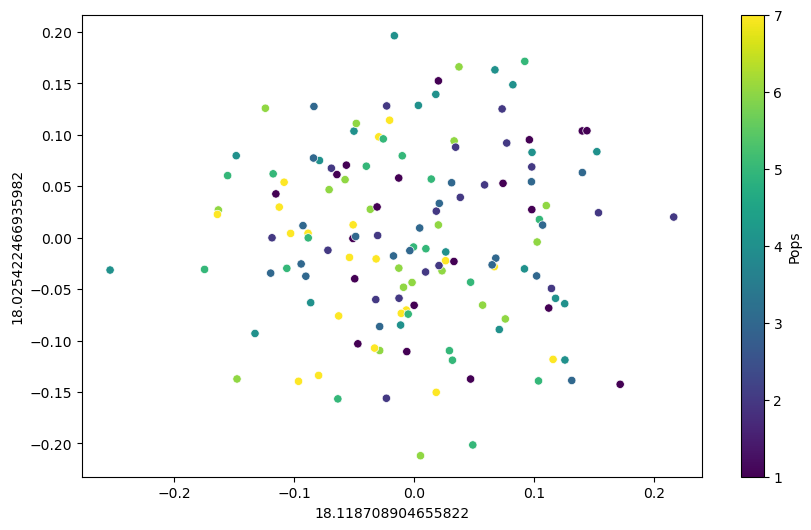

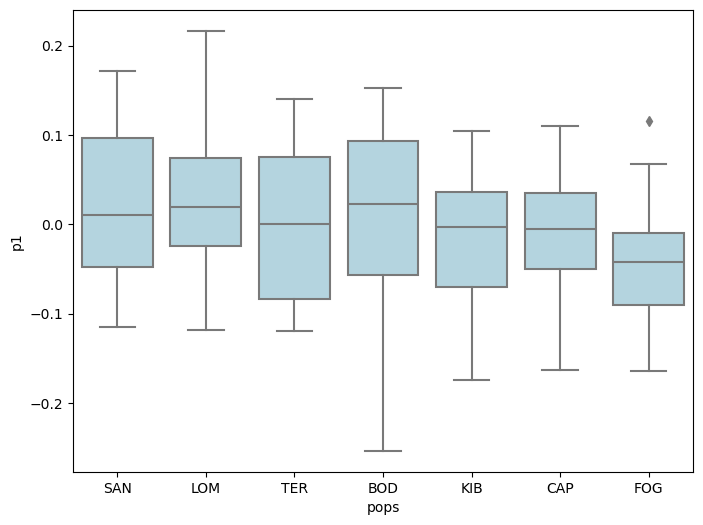

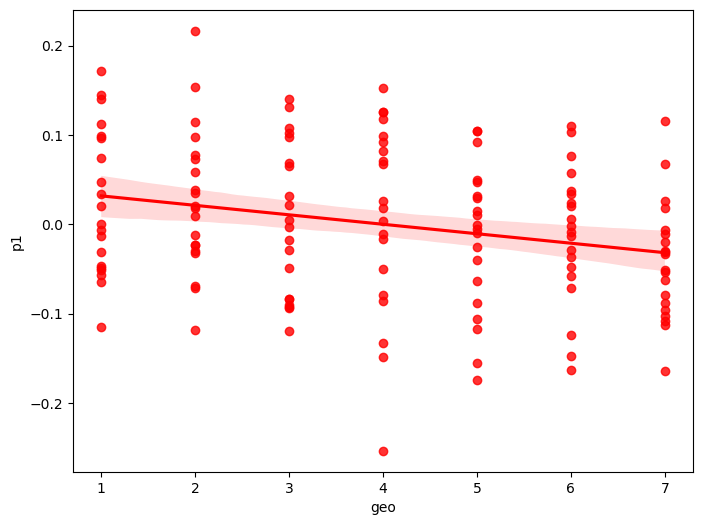

------------------------------------------------------
Percent of clusters most common pop:  1.7271929824561403
chrom    NW_022145615.1
start          17063929
end            17450904
Name: 30, dtype: object
ANOVA p-value:  0.2623894288696426
Correlation coefficient: -0.17073936577735652
P-value: 0.04370193066978928


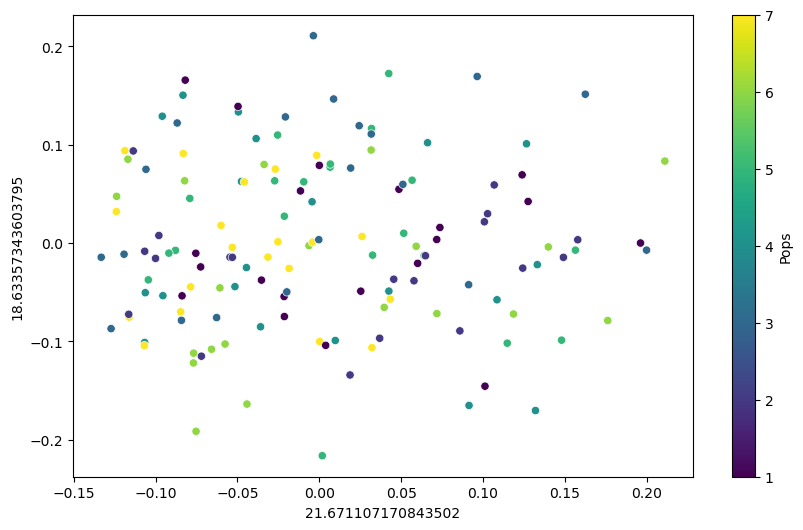

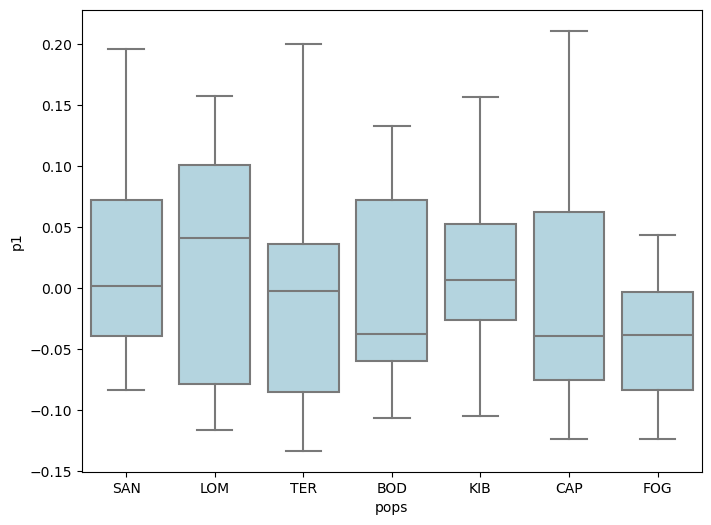

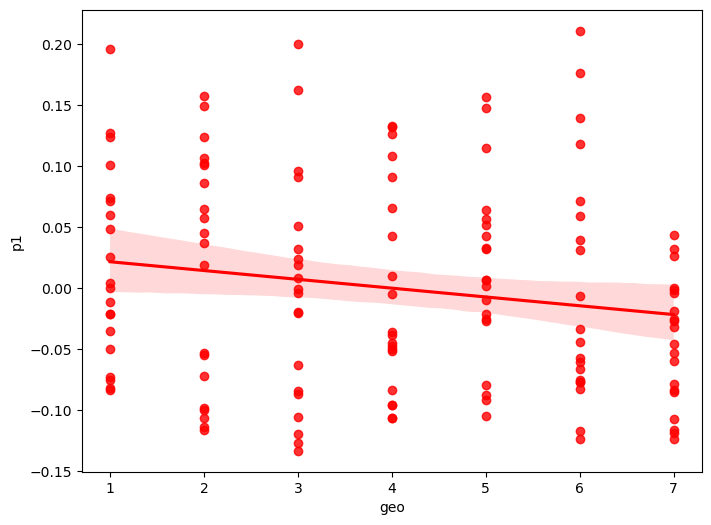

------------------------------------------------------
Percent of clusters most common pop:  2.1852828265426245
chrom    NW_022145615.1
start          22373998
end            22859537
Name: 43, dtype: object
ANOVA p-value:  0.06398518338976666
Correlation coefficient: -0.17369383338883487
P-value: 0.04013321402529275


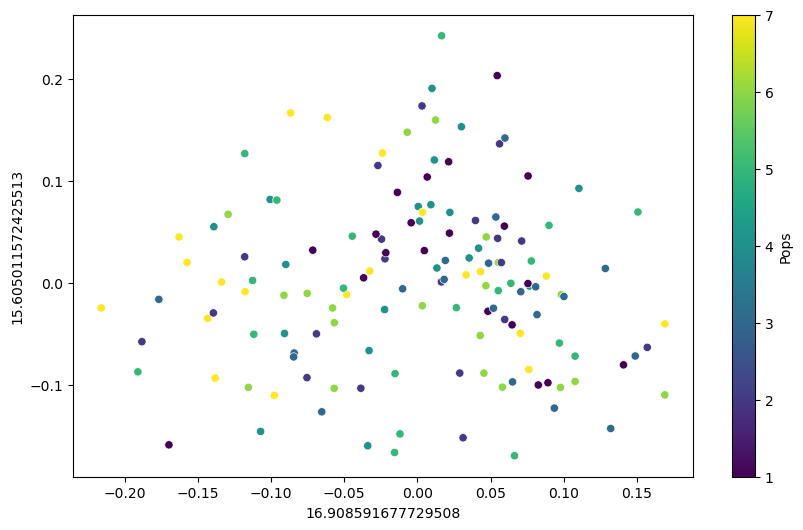

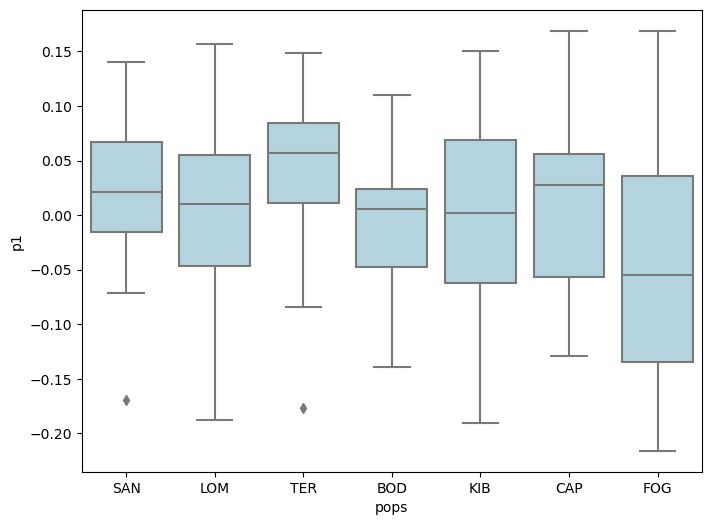

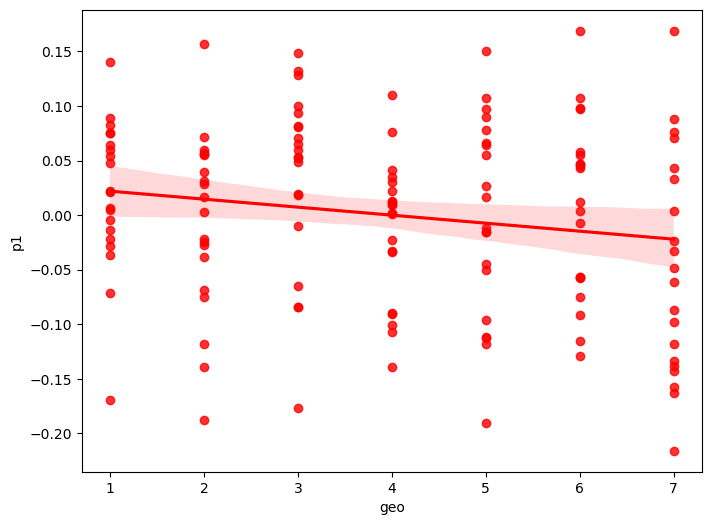

------------------------------------------------------
Percent of clusters most common pop:  2.0598429348429352
chrom    NW_022145615.1
start          28838188
end            29450272
Name: 54, dtype: object
ANOVA p-value:  0.1011519613521341
Correlation coefficient: -0.17651656263757406
P-value: 0.03695525019805715


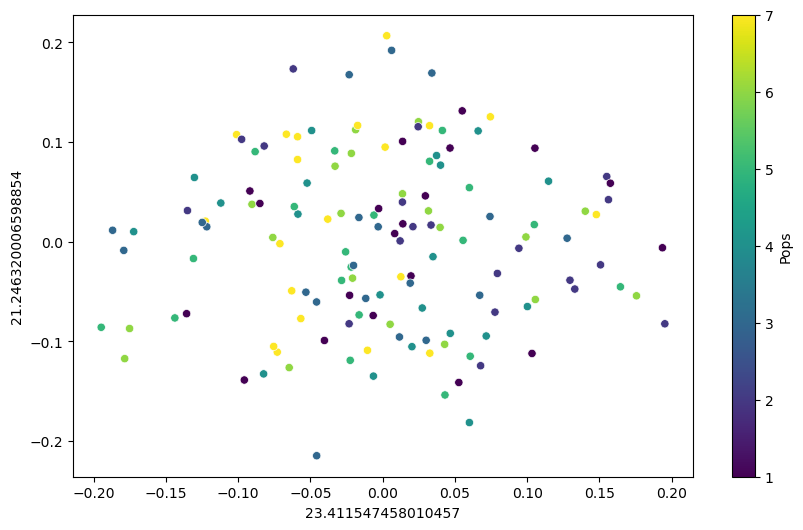

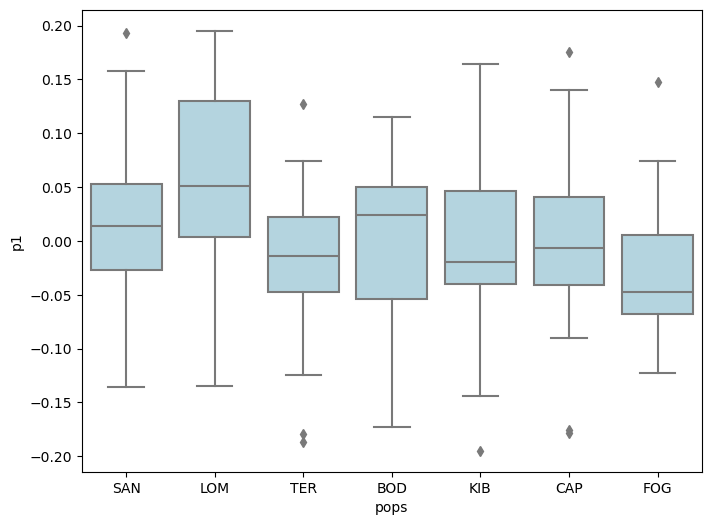

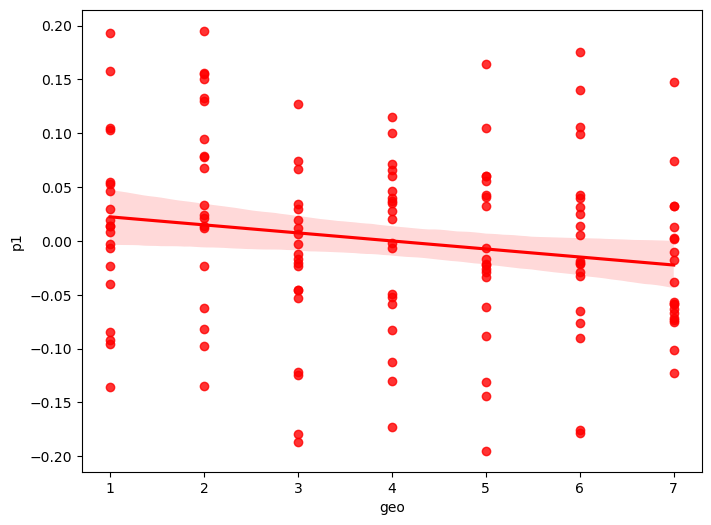

In [129]:
for i in range(len(df)):
    pcs=df.iloc[i].to_list()[3:]
    p1=np.array(pcs[:140])
    clusts=get_agglo(p1,NUM_CLUST)

    perc=0
    for c in range(NUM_CLUST):
      t=np.where(np.array(clusts) == c)[0]
      c_pops=np.array(pops)[t]
      mc=Counter(c_pops).most_common(1)[0][1]
      perc+=mc/len(c_pops) #what percentage of the cluster is the most common pop, higher better

      #vals.append(perc) #max is 7

    p1=pcs[:140]
    p2=pcs[140:]
    tdf=pd.DataFrame()
    tdf["p1"] = p1
    tdf["p2"] = p2
    tdf["pops"] = pops
    tdf["geo"] = np.repeat([4, 6, 7, 5, 2, 1, 3],20)

    order = ['SAN', 'LOM', 'TER', 'BOD', 'KIB', 'CAP', 'FOG']

    # Perform the ANOVA
    grouped_data = [tdf[tdf['pops'] == pop]['p1'] for pop in tdf['pops'].unique()]
    f_val, p_val = stats.f_oneway(*grouped_data)

    #Correlation
    corr_coeff, p_value = stats.pearsonr(tdf['geo'], tdf['p1'])
    
    if p_value <0.05:

        print("------------------------------------------------------")
        print("Percent of clusters most common pop: ",perc)
        print(coords.iloc[i])
        print("ANOVA p-value: ", p_val)
        print(f'Correlation coefficient: {corr_coeff}')
        print(f'P-value: {p_value}')

        #sns.scatterplot(data=tdf, x='p1', y='p2', hue='pops')
        fig, ax = plt.subplots(figsize=(10, 6))
        scatter=sns.scatterplot(x='p1', y='p2', hue='geo', data=tdf, palette='viridis', legend=None)
        norm = plt.Normalize(tdf['geo'].min(), tdf['geo'].max())
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
        sm.set_array([])

        # Add a color bar
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Pops')
        plt.xlabel(df.iloc[i].to_list()[1]/df.iloc[i].to_list()[0] *100)
        #percent variation explained is eigenvalue / sum of eigenvalues which is == to the total sum of squares
        # (checked lostruct package code)
        plt.ylabel(df.iloc[i].to_list()[2]/df.iloc[i].to_list()[0] *100)
        plt.show()

        fig = plt.figure(figsize=(8, 6))
        sns.boxplot(x='pops', y='p1', data=tdf, order=order,color='lightblue')
        plt.show()

        fig = plt.figure(figsize=(8, 6))
        sns.regplot(x='geo', y='p1', data=tdf, scatter=True, color='red')
        plt.show()
